Classify animals into dog and cat category based of given features 
- Plays Fetch Game
- Grumpy in nature
- Favorite food


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
from io import StringIO
dataset =StringIO('''Plays Fetch,Is grumpy,Favorite food,Species
Yes,No,Bacon,Dog
No,Yes,Dog Food,Dog
No,Yes,Cat Food,Cat
No,Yes,Bacon,Cat
No,No,Cat Food,Cat
No,Yes,Bacon,Cat
No,Yes,Cat Food,Cat
No,No,Dog Food,Dog
No,Yes,Cat Food,Cat
Yes,No,Dog Food,Dog
Yes,No,Bacon,Dog
No,No,Cat Food,Cat
Yes,Yes,Cat Food,Cat
Yes,Yes,Bacon,Dog
''')
df = pd.read_csv(dataset)

In [0]:
eat = {'bacon':0,'dog food':1,'cat food':2}
df['b_plays'] = df['Plays Fetch'].apply(lambda x: x=='Yes')
df['b_grumpy'] = np.where(df['Is grumpy'] == 'Yes',True,False)
df['eats'] = df['Favorite food'].apply(lambda x: eat[x.lower()])
df.head()

,Plays Fetch,Is grumpy,Favorite food,Species,b_plays,b_grumpy,eats
0,Yes,No,Bacon,Dog,True,False,0
1,No,Yes,Dog Food,Dog,False,True,1
2,No,Yes,Cat food,Cat,False,True,2
3,No,Yes,Bacon,Cat,False,True,0
4,No,No,Cat food,Cat,False,False,2


In [0]:
decisiontree = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
obtained_tree = decisiontree.fit(df[['b_plays','b_grumpy','eats']],df['Species'])
print('Extracted Classes :',decisiontree.classes_)

Extracted Classes : ['Cat' 'Dog']


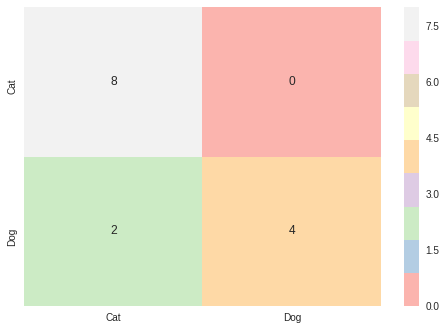

In [0]:
import seaborn as sb
Predicted_Species = obtained_tree.predict(df[['b_plays','b_grumpy','eats']])
sb.heatmap(confusion_matrix(df['Species'],Predicted_Species),
          annot=True,cmap='Pastel1',
          xticklabels=decisiontree.classes_,
          yticklabels=decisiontree.classes_)

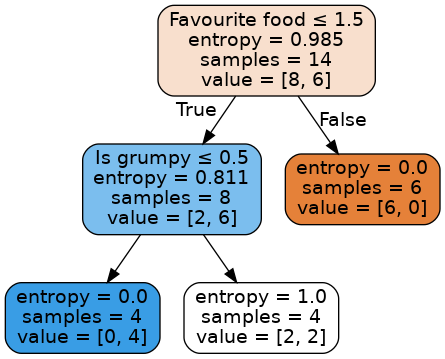

In [0]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

DecisionTreeImg = StringIO()

export_graphviz(obtained_tree,out_file=DecisionTreeImg ,
               filled = True,rounded = True,feature_names\
                =['Plays Fetch',"Is grumpy",'Favourite food'],special_characters = True)

graph = pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

# UNSUPERVISED LEARNING-clustering method

we use kmeans algorithm for clustering